In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt as sqrt

In [7]:
#datele experimentale pierdere liniara de sarcina
D = np.array([15, 20, 17.5, 23])
#am creat o lista de labeluri pe care le vom folosi la grafice
labels = np.array([f'{i} mm' for i in D])

Q1 = np.array([0.880, 0.844, 0.742, 0.608, 0.471, 0.403, 0.323, 0.293, 0.107])
Q2 = np.array([1.196, 0.996, 0.882, 0.805, 0.701, 0.640, 0.547, 0.405, 0.330])
Q3 = np.array([1.075, 0.917, 0.718, 0.692, 0.613, 0.516, 0.390, 0.238, 0.233]) 
Q4 = np.array([1.24, 1.05, 0.88, 0.80, 0.79, 0.69, 0.60, 0.5, 0.4])

delta_p1 = np.array([148.4, 135.13, 107.67, 75.38, 47.53, 35.64, 23.60, 20.07, 2.58])
delta_p2 = np.array([43.32, 29.58, 24.75, 20.46, 15.58, 13.32, 9.79, 5.42, 3.58])
delta_p3 =np.array([89.95, 66.33, 49.07, 39.17, 31.04, 22.68, 13.25, 4.81, 4.5]) 
delta_p4 =np.array([35.3, 25.3, 18.5, 14.8, 15.1, 11.5, 8.8, 5.81, 3.30]) 

In [8]:
#datele experimentale pierdere locala de saricna
Debite = {'curba 90': np.array([0.509, 0.446, 0.398, 0.345, 0.302, 0.238, 0.199]),
          'curba 45': np.array([0.60, 0.542, 0.509, 0.449, 0.407, 0.320, 0.232]),
          'cot 135': np.array([0.511, 0.438, 0.390, 0.362, 0.310, 0.261]),
          'cot 90':  np.array([0.603, 0.549, 0.500, 0.440, 0.391, 0.334, 0.300, 0.136])
         }

Presiuni = {'curba 90': np.array([1653, 1324.24, 1036.97, 763.29, 559.17, 311.50, 158.3]),
            'curba 45': np.array([22.91, 18.77, 17.08, 13.71, 10.64, 7.34, 3.50]),
            'cot 135': np.array([273.13, 200.49, 160.52, 139.12, 101, 71.47]),
            'cot 90': np.array([204.86, 168.73, 140.89, 109.90, 85.89, 65.56, 49.37, 7.88])           
           }


Zeta are formula: $\zeta=\frac{\Delta p D^4}{0.0826 \rho g L Q^2}$

Lambda are formula: $\lambda=\frac{\Delta p D^5}{0.0826 \rho g L Q^2}$

Folosim pentru Criteriul Reynolds formula: $Re = \frac{4Q}{\nu \pi D}$

In [ ]:
def zeta(delta_p, Diametru, Q, ro=1000 , g=9.81, L = 1):
    return delta_p*pow(Diametru,4) / (0.0826*ro*g*L*pow(Q,2))

In [3]:
def lamda(delta_p, D, Q, ro=1000 , g=9.81, L = 1):
    return delta_p*pow(D,5) / (0.0826*ro*g*L*pow(Q,2))

In [4]:
def Re(Q, D, v = pow(10,-6)):
    return 4*Q/(v*np.pi*D)

In [ ]:
def pierdere_sarcina(coef, Q, D, L = 1):
    return 0.0826*coef*L*pow(Q,2)/pow(D,5)

In [5]:
#varianta functie date neprelucrate
def creator_dataframe_neprelucrat(Q, delta_p, D):
    data ={'Q (dm^3/s)': Q,
           '\u0394p (mbar)': delta_p,
           'D(mm)': D,
           '\u03BB': lamda(delta_p, D, Q),
           'Re': Re(Q, D)}
    df = pd.DataFrame(data)
    return df

In [6]:
#export date neprelucrate catre ahmad
df1_ahmad = creator_dataframe_neprelucrat(Q1, delta_p1, D[0])
df2_ahmad = creator_dataframe_neprelucrat(Q2, delta_p2, D[1])
df3_ahmad = creator_dataframe_neprelucrat(Q3, delta_p3, D[2])
df4_ahmad = creator_dataframe_neprelucrat(Q4, delta_p4, D[3])

with pd.ExcelWriter('Det exp a coef pierdere sarcina.xlsx') as writer:  

    df1_ahmad.to_excel(writer, sheet_name='Masuratori 15mm')
    df2_ahmad.to_excel(writer, sheet_name='Masuratori 20mm')    
    df3_ahmad.to_excel(writer, sheet_name='Masuratori 17.5mm')
    df4_ahmad.to_excel(writer, sheet_name='Masuratori 23mm')    

In [7]:
#datele exp prelucraete in S.I. de unitati de masura dm^3 --> m^3, mbar--> Pa, mm--> m
def creator_dataframe_lamda (Q, delta_p, D):
    data ={'Q (m^3/s)': (Q_0 := Q*pow(10,-3) ),
           '\u0394p (Pa)': (delta_p0 := delta_p * pow(10,2) ),
           'D(m)': (D_0 := D*pow(10,-3) ) ,
           '\u03BB': lamda(delta_p0, D_0 , Q_0 ),
           'Re': Re(Q_0, D_0) }
    df = pd.DataFrame(data)
    return df

In [8]:
#creare dataframeuri prelucrate
df1 = creator_dataframe(Q1, delta_p1, D[0] )
df2 = creator_dataframe(Q2, delta_p2, D[1] )
df3 = creator_dataframe(Q3, delta_p3, D[2] )
df4 = creator_dataframe(Q4, delta_p4, D[3] )

In [9]:
#afisare dataframeuri prelucrate
print (df1)
print (df2)
print (df3)
print (df4)

   Q (m^3/s)  Δp (Pa)   D(m)         λ            Re
0   0.000880  14840.0  0.015  0.017959  74696.719958
1   0.000844  13513.0  0.015  0.017778  71640.945050
2   0.000742  10767.0  0.015  0.018327  62982.916146
3   0.000608   7538.0  0.015  0.019110  51608.642880
4   0.000471   4753.0  0.015  0.020079  39979.721705
5   0.000403   3564.0  0.015  0.020565  34207.702435
6   0.000323   2360.0  0.015  0.021199  27417.091530
7   0.000293   2007.0  0.015  0.021909  24870.612440
8   0.000107    258.0  0.015  0.021118   9082.442086
   Q (m^3/s)  Δp (Pa)  D(m)         λ            Re
0   0.001196   4332.0  0.02  0.011960  76139.724775
1   0.000996   2958.0  0.02  0.011776  63407.329328
2   0.000882   2475.0  0.02  0.012564  56149.863923
3   0.000805   2046.0  0.02  0.012469  51247.891676
4   0.000701   1558.0  0.02  0.012521  44627.046043
5   0.000640   1332.0  0.02  0.012842  40743.665432
6   0.000547    979.0  0.02  0.012921  34823.101549
7   0.000405    542.0  0.02  0.013049  25783.100781
8 

In [10]:
#x pt Reynolds
x1 = df1.iloc[:,4]
x2 = df2.iloc[:,4]
x3 = df3.iloc[:,4]
x4 = df4.iloc[:,4]
#folosit pentru grafice

X = np.array([x1, x2, x3, x4])

#y pt lamda
y1 = df1.iloc[:,3]
y2 = df2.iloc[:,3]
y3 = df3.iloc[:,3]
y4 = df4.iloc[:,3]

#folosit pentru grafice

Y = np.array([y1, y2, y3, y4])

values = zip(X,Y)

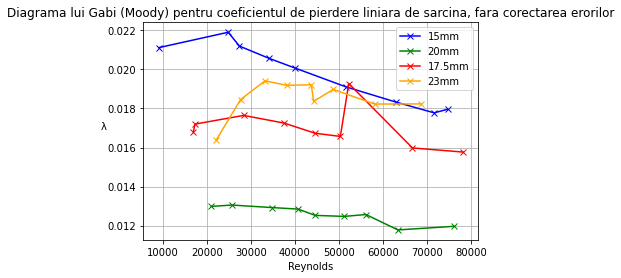

In [11]:
#plotare diagrama
plt.title("Diagrama lui Gabi (Moody) pentru coeficientul de pierdere liniara de sarcina, fara corectarea erorilor")

plt.plot(x1, y1, color = 'blue', marker = 'x', label = '15mm')
plt.plot(x2, y2, color = 'green', marker = 'x', label = '20mm')
plt.plot(x3, y3, color = 'red', marker = 'x', label = '17.5mm')
plt.plot(x4, y4, color = 'orange', marker = 'x', label = '23mm')
plt.legend()
plt.ylabel('\u03BB', rotation = 0) #lambda
plt.xlabel('Reynolds')

#plt.xticks( S, S_show, size = 8)
#plt.yticks( y, size = 8)

plt.grid(True)
#plt.xscale('log')

# Display Graph
plt.show()

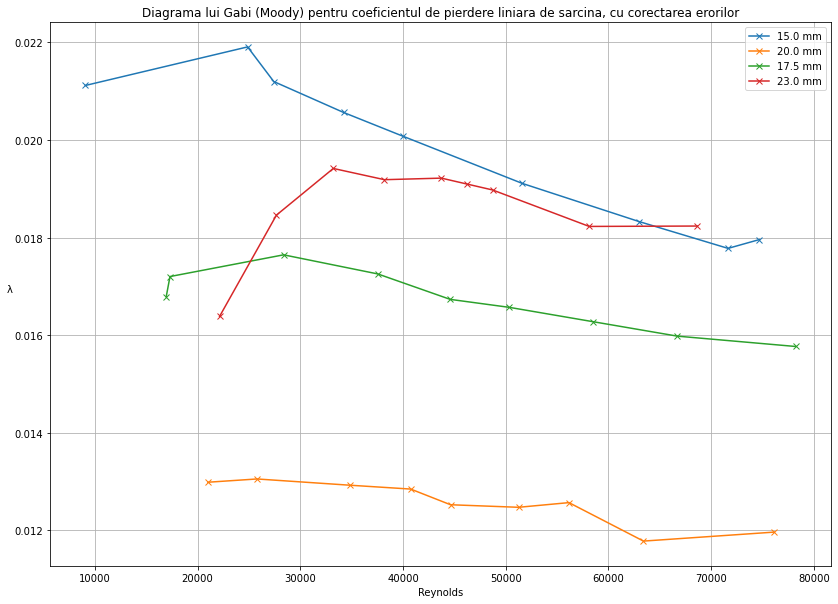

In [19]:
#note for fututre refference, ordoneaza ti datele de la cel mai mic la cel mai mare, nu invers
x4_mod = x4
y4_mod = y4
x4_mod[3] = x4_mod[4] + sqrt(pow( x4_mod[2] - x4_mod[4], 2))/2
y4_mod[3] = y4_mod[4] - sqrt(pow( y4_mod[2] - y4_mod[4], 2))/2

#something sus is diffing??? +/

x3_mod = x3
y3_mod = y3
x3_mod[2] = x3_mod[3] + (x3_mod[1] - x3_mod[3])/2
y3_mod[2] = y3_mod[3] + (y3_mod[1] - y3_mod[3])/2

X = np.array([x1, x2, x3_mod, x4_mod])
Y = np.array([y1, y2, y3_mod, y4_mod])

values = zip(X,Y)

plt.title("Diagrama lui Gabi (Moody) pentru coeficientul de pierdere liniara de sarcina, cu corectarea erorilor")
plt.rcParams['figure.figsize'] = [14, 10]
#am incercat o varianta iterativa in plotarea graficului de data asta

i = 0
for x, y in values:
    plt.plot(x, y, marker = 'x', label = labels[i])
    i += 1
    
plt.legend()
plt.ylabel('\u03BB', rotation = 0) #lambda
plt.xlabel('Reynolds')
plt.grid(True)


# Display Graph
plt.show()